### Задание 1
#### Условие
Дана система:
\begin{cases}
 \dot N_1(t) = -N_1(t)N_2(t), \\
 \dot N_2(t) = -\alpha N_2(t)(1 - N_1(t)),(1) \\
 \dot N_3(t) = \alpha N_2(t).
\end{cases}
Здесь $ N_1(t) $ – доля населения, восприимчивая к заражению данным вирусом;
$ N_2(t) $ – степень зараженности населения на данный момент; $N_3(t)$ – мера
невосприимчивости к данному вирусу (иммунитет); $\alpha$ – положительный параметр. Число людей, которые заражаются повторно, пропорционально вели-
чине $N_1(t) N_2(t)$.
Задачи:
1. Найти положения равновесия системы (1).
2. Исследовать на устойчивость положения равновесия системы (1).
3. Построить фазовые портреты системы (1) для разных начальных условий.
4. Установить бифуркационные значения параметра $\alpha$ для $N_2(t)$ и $N_3(t)$.

#### Решение задачи 1

In [24]:
%matplotlib notebook
from numpy import *
import pylab as p
from scipy.integrate import odeint

# Definition of parameters

def dN_dt(N, t=0):
    return array([ -N[0]*N[1],
                  -alpha*N[1]*(1 - N[0]),
                  alpha*N[1]
                 ])

In [2]:
alpha = 0.5
N_f1 = array([3, 0, 15])
result = dN_dt(N_f1)
result

array([ 0.,  0.,  0.])

In [3]:
def jacobian(N, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[-N[1],      -N[0],           0],
                  [ alpha*N[1], alpha*(N[0]-1), 0],
                  [ 0,          alpha,          0]
                 ])

In [4]:
A_f1 = jacobian(N_f1)
A_f1

array([[ 0. , -3. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.5,  0. ]])

Получаем устойчивый фокус:

In [5]:
lambda1, lambda2, lambda3 = linalg.eigvals(A_f1)
lambda1, lambda2, lambda3

(0.0, 0.0, 1.0)

In [17]:
t = arange(0, 2.5, 0.01)
X0 = array([10, 5, 4])  
X, infodict = odeint(dN_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

<IPython.core.display.Javascript object>


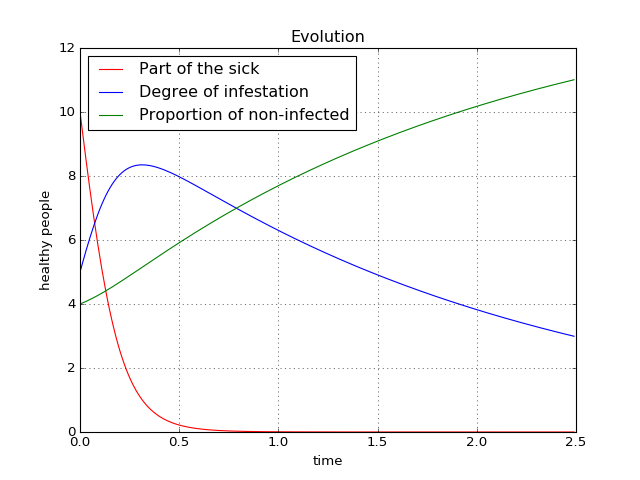

In [20]:
#!python
people, degree_of_infestation, measure_of_susceptibility  = X.T
f1 = p.figure()
p.plot(t, people, 'r-', label='Part of the sick')
p.plot(t, degree_of_infestation  , 'b-', label='Degree of infestation')
p.plot(t, measure_of_susceptibility  , 'g-', label='Proportion of non-infected')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('healthy people')
p.title('Evolution')
p.show()

Построим фазовый портрет:

<IPython.core.display.Javascript object>


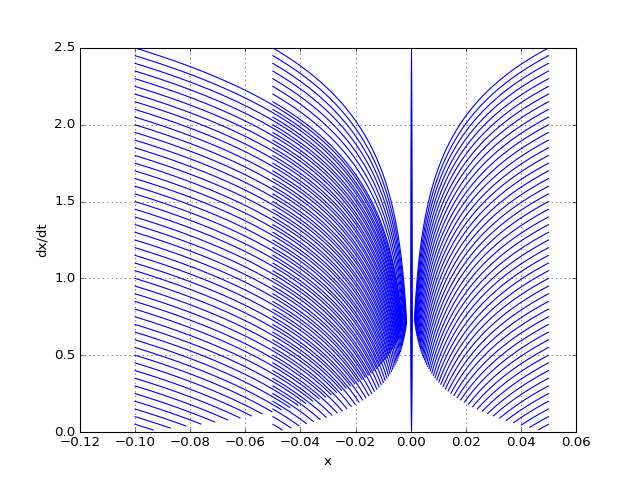

In [21]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
def drawPhasePortrait(deltaX = 1.0, deltaDX = 1.0,startX = 0.0,  stopX = 5.0,
                      startDX = 0.0, stopDX = 5.0):
    for y0 in frange(startX, stopX, deltaX):
            for dy0 in frange(startDX, stopDX, deltaDX):
                sol = odeint(dN_dt, [y0, dy0, 0], t)
                p.plot(sol[:, 0], sol[:, 1], 'b')
    p.xlabel('x')
    p.ylabel('dx/dt')
    p.grid()
    p.show()
drawPhasePortrait(0.05, 0.05, -0.1, 0.1, 0.0, 2.5)